In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12,8)})

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_spss('HyP_2020_Terceros.sav')

df = df.rename(columns={
    'numero': 'id_hogar',
    'e26': 'sexo',
    'e27': 'edad',
    'e563': 'genero',
    'e29_6': 'ascendencia',
    'e30': 'parentesco',
    'pobpcoac': 'estado_laboral',
    'g126_1': 'sueldo',
    'f99': 'busca_otro_trabajo',
    'f72_2': 'actividad'
    ''
    })

df = df[[
    'id_hogar', 
    'sexo', 
    'edad', 
    'genero', 
    'ascendencia', 
    'parentesco', 
    'estado_laboral', 
    'nper', 
    'sueldo', 
    'busca_otro_trabajo',
    'actividad'
    ]]

df['nper'] = df['nper'].astype('category')
df['sexo'] = df['sexo'].apply(lambda x:'Masculino' if x == 1 else 'Femenino')

In [3]:
df.sample(5)

,id_hogar,sexo,edad,genero,ascendencia,parentesco,estado_laboral,nper,sueldo,busca_otro_trabajo,actividad
124375,7918,Femenino,16.0,Mujer,Blanca,Hijo/a solo del jefe/a,"Inactivo, estudiante",3.0,0.0,0.0,
130538,13850,Masculino,63.0,Varón,Blanca,Jefe/a de hogar,Ocupados,1.0,0.0,No,"Instalaciones sanitarias, de calefacción y de ..."
50295,30923,Masculino,33.0,Varón,Blanca,Jefe/a de hogar,Ocupados,1.0,50000.0,No,Construcción de obras de arquitectura
130865,14980,Masculino,46.0,Varón,Blanca,Jefe/a de hogar,Ocupados,1.0,0.0,No,Otros transportes terrestres de pasajeros
92126,47836,Masculino,42.0,Varón,Sin dato,Esposo/a o compañero/a,Ocupados,2.0,0.0,No,Cría de ganado vacuno y búfalos


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145166 entries, 0 to 145165
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   id_hogar            145166 non-null  object  
 1   sexo                145166 non-null  object  
 2   edad                145166 non-null  float64 
 3   genero              145166 non-null  category
 4   ascendencia         145166 non-null  category
 5   parentesco          145166 non-null  category
 6   estado_laboral      145166 non-null  category
 7   nper                145166 non-null  category
 8   sueldo              145166 non-null  float64 
 9   busca_otro_trabajo  145166 non-null  category
 10  actividad           145166 non-null  category
dtypes: category(7), float64(2), object(2)
memory usage: 5.6+ MB


In [5]:
df.groupby(by='estado_laboral').mean()

,edad,sueldo
estado_laboral,,
Desocupados BT1V,20.338000,0.000000
Desocupados en seguro de desempleo,37.865566,2287.735849
Desocupados propiamente dichos,34.348766,1062.989286
"Inactivo, estudiante",17.600253,56.501901
"Inactivo, jubilado",72.474731,90.880665
"Inactivo, otro",35.807848,284.520485
"Inactivo, pensionista",63.898536,16.830319
"Inactivo, realiza los quehaceres del hogar",48.915314,271.754564
"Inactivo, rentista",57.296970,105.858586


# Personas con trabajo

In [6]:
df = df[df['estado_laboral'].str.contains('Ocupados')]
df = df[df['edad'] > 14]
df = df[df['sueldo'] > 0]

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
edad,42787.0,41.944048,12.439142,15.0,32.0,42.0,51.0,93.0
sueldo,42787.0,32662.146680,25165.955402,200.0,18000.0,27000.0,40000.0,600000.0


In [8]:
quantil_99 = df['sueldo'].quantile(0.99)
print(quantil_99)

df_no_outliers = df.copy()[df['sueldo'] < quantil_99]

quartil_1 = df_no_outliers['sueldo'].quantile(0.25)
quartil_3 = df_no_outliers['sueldo'].quantile(0.75)

iqr =  quartil_3 - quartil_1

df_no_outliers = df_no_outliers[df_no_outliers['sueldo'] < quartil_3 + 1.5 * iqr]

df_no_outliers = df_no_outliers[df_no_outliers['sueldo'] > quartil_1 - 1.5 * iqr]

130000.0


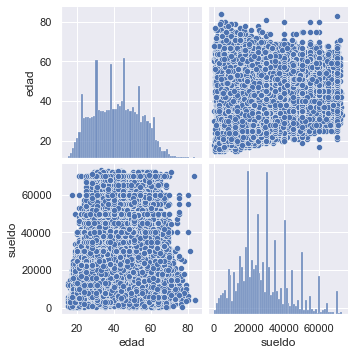

In [9]:
sns.pairplot(data=df_no_outliers)

<AxesSubplot:xlabel='ascendencia', ylabel='sueldo'>

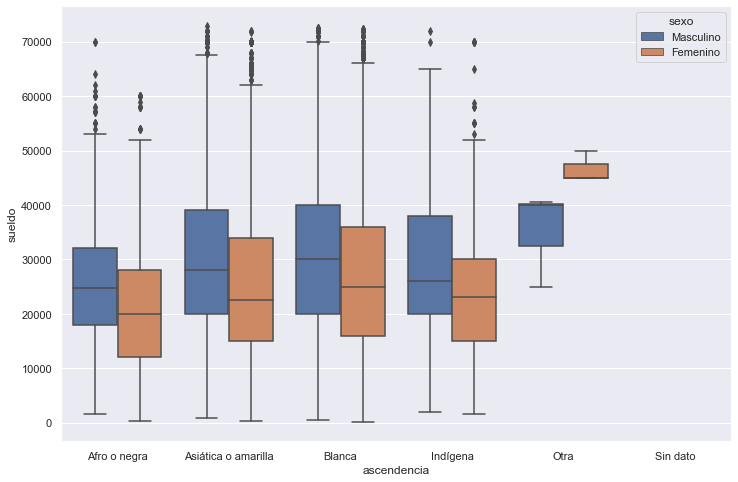

In [10]:
df_no_outliers = df_no_outliers[~df_no_outliers['ascendencia'].str.contains('Sin dato')]

sns.boxplot(data=df_no_outliers, x='ascendencia', y='sueldo', hue='sexo')

<AxesSubplot:xlabel='edad', ylabel='sueldo'>

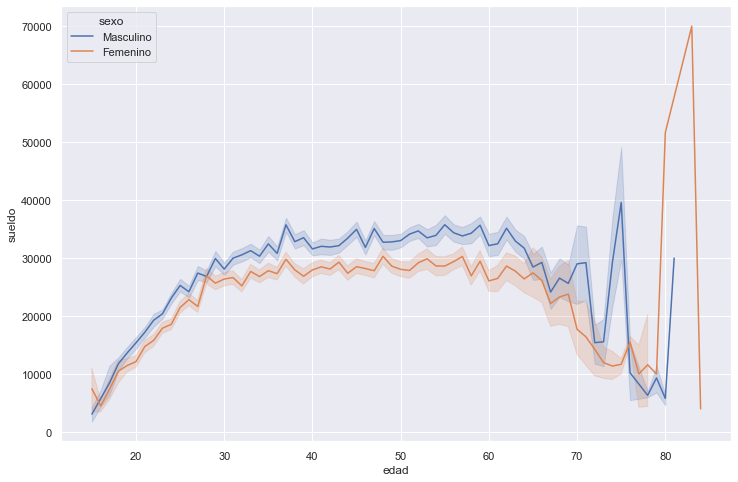

In [11]:
sns.lineplot(data=df_no_outliers, x='edad', y='sueldo',hue='sexo')